========================================================================================================================

## Divergence Theorem ##
 
 **With Python SymPy**
 
 The next Examples and Practice Problems and their images come from **Paul Dawkins** excellent lecture 
notes: http://tutorial.math.lamar.edu/index.aspx, where you can the find the underlying theory of calculations and the detailed 'paper and pen' solutions. To use this material you must read *'Terms of Use'* from https://tutorial.math.lamar.edu/Terms.aspx. 

========================================================================================================================

**Divergence Theorem.** Let *E* be a simple solid region and *S* is the boundary surface of *E* with positive orientation. Let $\vec{F}$ be a vector field whose components have continuous first order partial derivatives. Then,

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\iint\limits_{S}{{\vec F\centerdot d\vec S}} = \iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$

(Watch YouTube: Dr. Trefor Bazett, Divergence Theorem) 

Here in all solutions we use SymPy's **ParametricRegion** method.

=========================================================================================================================


In [1]:
import sympy as sp
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, Del, gradient, divergence, vector_integrate
                                     
from sympy.abc import r, x, y, z, t, theta, phi
C = CoordSys3D('C')

========================================================================================================================

**SymPy Example. Verifying Divergence Theorem** *[SymPy 1.12 doc]*

In [2]:
# LEFT SIDE: The surface integral across the sphere

field = C.x**3*C.i + C.y**3*C.j + C.z**3*C.k                          # Vectorfield in CoordSys3D('C').  Obs. C.x, C.y, C.z!

sphere = ParametricRegion((4*sin(phi)*cos(theta),4*sin(phi)*sin(theta), 4*cos(phi)),            # 2D surface
                        (phi, 0, pi), (theta, 0, 2*pi))                                         # two parameters for surface
vector_integrate(field, sphere)

12288*pi/5

In [3]:
# RIGHT SIDE: The volume intgral across the sphere

solidsphere = ParametricRegion((r*sin(phi)*cos(theta),r*sin(phi)*sin(theta), r*cos(phi)),   # 3D solid
    (r, 0, 4),(phi, 0, pi), (theta, 0, 2*pi))                                               # three variables for solid 3D
vector_integrate(divergence(field), solidsphere)

12288*pi/5

=======================================================================================================================

**Example 1.** Use the divergence theorem to evaluate 
$\displaystyle \iint\limits_{S}{{\vec F\centerdot d\vec S}}$ where $\vec F = xy\,\vec i - \frac{1}{2}{y^2}\,\vec j + z\,\vec k$
 and the surface consists of the three surfaces, $ z = 4 - 3{x^2} - 3{y^2}$, $1 \le z \le 4$     on the top, ${x^2} + {y^2} = 1$, $0 \le z \le 1$ on the sides and *z = 0* on the bottom.


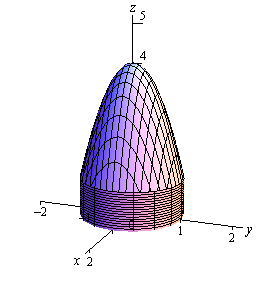

**Solution 1.** We calculate the integral $ \iiint\limits_{E}{{{\mathop{\rm div}\nolimits} \vec F\,dV}}$  in the cylindrical coordinates, where $z= 4-3r^2$  &nbsp;  $({x^2} + {y^2} = r )$

In [4]:
F =  C.x*C.y*C.i - (1/2)*C.y**2*C.j + C.z*C.k                                          # Vectorfield in CoordSys3D('C') 
divF = divergence(F)

# 3D region (volume) in cylindrical coordinates: <x,y,z> parametrized by r, theta and z. (three variables for volume)
vol = ParametricRegion((r*cos(theta), r*sin(theta), z),
                       (z, 0, 4-3*r**2), (r, 0, 1), (theta, 0, 2*pi))                  # the limits 
vector_integrate(divF, vol)                                                            # Volume integral

5*pi/2

===========================

**Example 1. solution 2.** SymPy gives us an easy way to calculate the surface integral $\iint\limits_{S}{{\vec F\centerdot d\vec S}}$ directly. The integration is performed in the cylindrical coordinate system.

In [5]:
F =  C.x*C.y*C.i - (1/2)*C.y**2*C.j + C.z*C.k                                          # Obs. C.x, C.y, C.z !!

# 2D region in cylindrical coordinates: <x,y,z> parametrized by r and theta. (two variables for surface)
surf = ParametricRegion((r*cos(theta), r*sin(theta), 4-3*r**2),
                       (r, 0, 1), (theta, 0, 2*pi))                                    # the limits 
vector_integrate(F, surf)                                                              # Surface integral

2.5*pi

=====================================================================================================================

**Problem 1.**  Use the Divergence Theorem to evaluate $\displaystyle \iint\limits_{S}{{\vec F\centerdot d\vec S}} \,$ where  
$\vec F = y{x^2}\,\vec i + \left( {x{y^2} - 3{z^4}} \right)\,\vec j + \left( {{x^3} + {y^2}} \right) \,\vec k $ and $S$ is the surface of the sphere of radius 4 with $ z ≤ 0 $ and $ y ≤ 0 $. Note that all three surfaces of this solid are included in $S$.

 **Solution.** We calculate the integral $\iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$  in the spherical coordinate system.


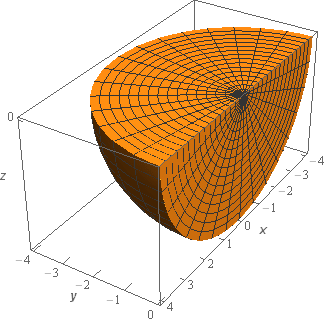

In [6]:
F = C.y*C.x**2*C.i +(C.x*C.y**2 - 3*C.z**4)*C.j + (C.x**3 + C.y**2)*C.k  
divF = divergence (F)                                                                 # Or: Del().dot(F).doit()

# 3D solid region in spherical coordinates: ( <x,y,z> -> <r, theta, phi>), (limits) 
E = ParametricRegion((r*sin(theta)*cos(phi), r*sin(theta)*sin(phi), r*cos(theta)),
                       (r, 0, 4),(theta, pi/2, pi), (phi, pi, 2*pi))                  # Three variables for solid 3D

vector_integrate(divF, E)                                                             # Volume integral

0

In this problem, the use of the Divergence Theorem was useful, as the surface integral would have to be calculated from three different surfaces and use both a spherical coordinate system and two different polar coordinate systems with their own boundaries. 

===============================================================================================

**Problem 2.** Use the Divergence Theorem to evaluate $\displaystyle \iint\limits_{S}{{\vec F\centerdot d\vec S}} \,$ where  $\vec F = sin(\pi x)\,\vec i + \left( {z{y^3}} \right)\,\vec j + \left( {{z^2} + {4x}} \right) \,\vec k \, $ and $S$ is the surface of the box with $- 1 \le x \le 2$, &nbsp; $ 0 \le y \le 1$ and $1 \le z \le 4$ Note that all six sides of the box are included in $S$. 


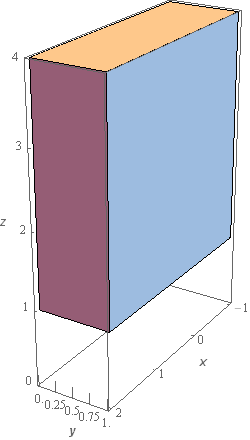

 **Solution.** Again, we'd have a lot of surfaces to integrate. So it's helpful to use the Divergence Theorem option to convert it to a volume integral $\iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}.$ Here the integration is of course performed in the standard Cartesian coordinates.


In [7]:
F = sp.sin(pi*C.x)*C.i +(C.z*C.y**3 )*C.j + (C.z**2 + 4*C.x**2)*C.k                 # Vector field 
divF = Del().dot(F).doit()                                                          # Or: divergence(F)
E = ParametricRegion((x, y, z),  (x, -1, 2), (y, 0, 1), (z, 1, 4))                  # 3D region
vector_integrate(divF, E)                                                           # Volume integral

135/2

============================================================================================

**Problem 3.**  Use the Divergence Theorem to evaluate $\displaystyle \iint\limits_{S}{{\vec F\centerdot d\vec S}} \, \,$ where 
$\vec F = 2xz\vec i + \left( {1 - 4x{y^2}} \right)\vec j + \left( {2z - {z^2}} \right)\vec k \, \, $  and S is the surface of the solid bounded by $z = 6 - 2{x^2} - 2{y^2}$ and the plane 
$z = 0$. Note that both of the surfaces of this solid included in $S$.

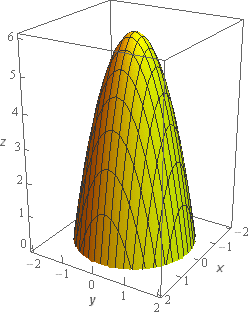

**Solution.** We calculate the integral $ \iiint\limits_{E}{{{\mathop{ \rm \nabla \cdot}\nolimits} \vec F\,dV}}$ in the cylindrical coordinate system, where $ z = 6 - 2r^2$.  In this task too, it is economical to calculate one volume integral instead of two surface integrals.

In [8]:
from sympy import cos, sin, pi
from sympy.vector import CoordSys3D, ParametricRegion, ParametricIntegral
from sympy.abc import r, t, theta, phi
C = CoordSys3D('C')

In [9]:
F = 2*C.x*C.z*C.i + (1 - 4*C.x*C.y**2)*C.j + (2*C.z - C.z**2)*C.k              # Vectorfield in CoordSys3D('C')
divF = divergence (F)                                                          # Or: Del().dot(F).doit()

# Solid 3D region in cylindrical coordinates:
E = ParametricRegion((r*cos(theta), r*sin(theta), z),
                     (z, 0, 6-2*r**2), (r, 0, sp.sqrt(3)), (theta, 0, 2*pi))

vector_integrate(divF, E)                                                      # As well: ParametricIntegral(divF, E).doit()

18*pi

======================

Code: Heikki Miettinen 2024